In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
# 데이터 CSV 파일 읽기
file_path = r"C:\Users\이예일\Downloads\car_evaluation.csv"
df = pd.read_csv(file_path)

# 데이터프레임 확인
display(df.head())
print(df.columns)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


In [33]:
# 결측치 확인
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [34]:
# 레이블 확인
df['unacc'].value_counts()

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [35]:
le_X = LabelEncoder()
X_encoded = X.apply(le_X.fit_transform)  # 모든 범주형 컬럼에 label encoding
X_np = X_encoded.values  # numpy 배열로 변환
le_y = LabelEncoder()
y_int = le_y.fit_transform(y)
y_onehot = to_categorical(y_int)

In [37]:
# 레이블 확인
X_encoded

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [39]:
y_onehot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_onehot, test_size=0.2, random_state=42)

In [57]:
model = Sequential()
model.add(Dense(64, input_shape=(6,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 클래스 개수 = 4

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,716 (14.52 KB)

 Trainable params: 3,716 (14.52 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6703 - loss: 0.9296 - val_accuracy: 0.6751 - val_loss: 0.8305
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7083 - loss: 0.7021 - val_accuracy: 0.6787 - val_loss: 0.7399
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6983 - loss: 0.6501 - val_accuracy: 0.6751 - val_loss: 0.6847
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7068 - loss: 0.6034 - val_accuracy: 0.6895 - val_loss: 0.6496
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6775 - loss: 0.6114 - val_accuracy: 0.6787 - val_loss: 0.6166
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7508 - loss: 0.5338 - val_accuracy: 0.7184 - val_loss: 0.5699
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7648 - loss: 0.4885 - val_accuracy: 0.7726 - val_loss: 0.5070
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7948 - loss: 0.4573 - val_accuracy: 0.8412 - val_loss:

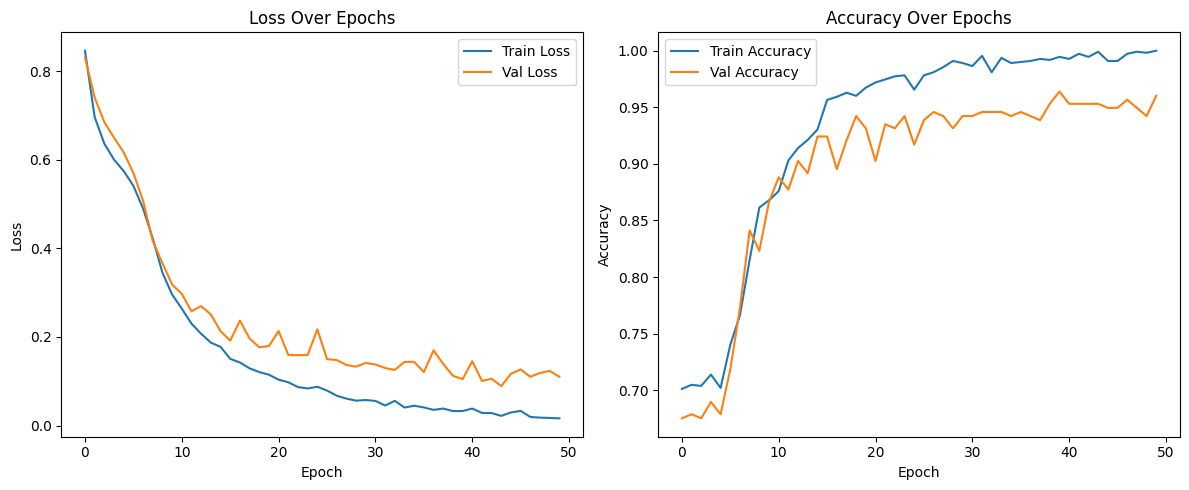

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9683 - loss: 0.0955 


[0.09578369557857513, 0.9682080745697021]